In [1]:
%matplotlib inline

In [2]:
import cf2mongo as cf2m
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
crowdflower_data_path = "../Data/CrowdFlowerData/Football-Scenarios-DFE-832307.csv"
crowd_flower = cf2m.run_conversion(crowdflower_data_path)
crowd_flower.head()

,scenario,down,yards,field,quarter,clock,score,guess
0,It is first down and 10. The ball is on your o...,1.0,10.0,20.0,2.0,3.0,-3.0,fg
1,It is second down and inches. The ball is on y...,2.0,0.0,5.0,2.0,3.0,-3.0,fg
2,It is second down and inches. The ball is on y...,2.0,0.0,20.0,2.0,3.0,-3.0,fg
3,It is second down and inches. The ball is on y...,2.0,0.0,5.0,4.0,3.0,-3.0,fg
4,It is second down and inches. The ball is on y...,2.0,0.0,20.0,4.0,3.0,-3.0,fg


In [4]:
g = crowd_flower.groupby(['down','guess']).count().scenario.reset_index().pivot_table(index='down',columns='guess',values='scenario')
g['total'] = g.sum(axis=1)
g = g.reset_index()
g.columns.name = ''
down_guess = g.copy()
down_guess = down_guess[['down','pass','run','fg','punt','kneel','idk','total']]
down_guess

,down,pass,run,fg,punt,kneel,idk,total
0,1.0,148.0,49.0,10.0,NaN,2.0,8.0,217.0
1,2.0,477.0,521.0,63.0,NaN,10.0,13.0,1084.0
2,3.0,571.0,458.0,76.0,NaN,40.0,18.0,1163.0
3,4.0,131.0,115.0,456.0,408.0,33.0,21.0,1164.0


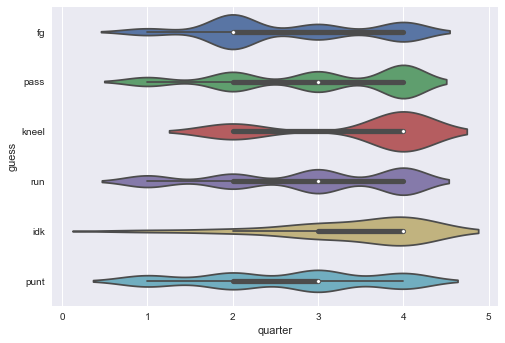

In [5]:
sns.violinplot(data=crowd_flower,x='quarter',y='guess')

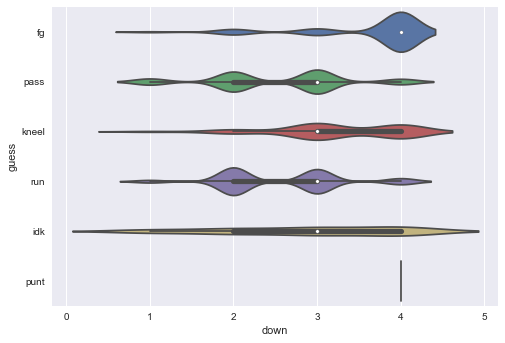

In [6]:
sns.violinplot(data=crowd_flower,x='down',y='guess')

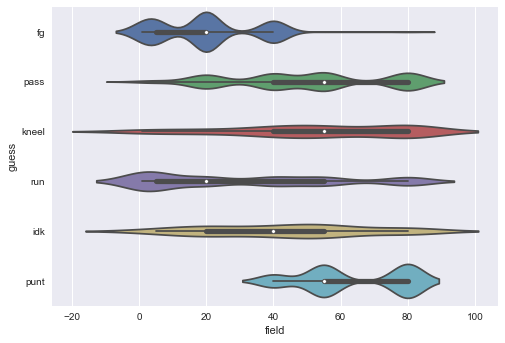

In [7]:
sns.violinplot(data=crowd_flower,x='field',y='guess')

In [8]:
def plot_PlayType(df,stat,playtypelist=['pass','run','fg','kneel','punt','idk'],percent_total=False):
    g = df.groupby([stat,'guess']).count().reset_index()
    g = g[g.columns[0:3]]
    last_col_name = g.columns[-1]
    g1 = g.groupby([stat, 'guess']).agg({last_col_name: 'sum'})
    if percent_total:
        g1 = g1.groupby(level=1).apply(lambda x: 100 * x / float(x.sum()))
    g1 = g1.reset_index()
    g1 = g1[g1.guess.apply(lambda x: x in playtypelist)]
    return sns.barplot(x=stat, y=last_col_name, hue="guess", data=g1)

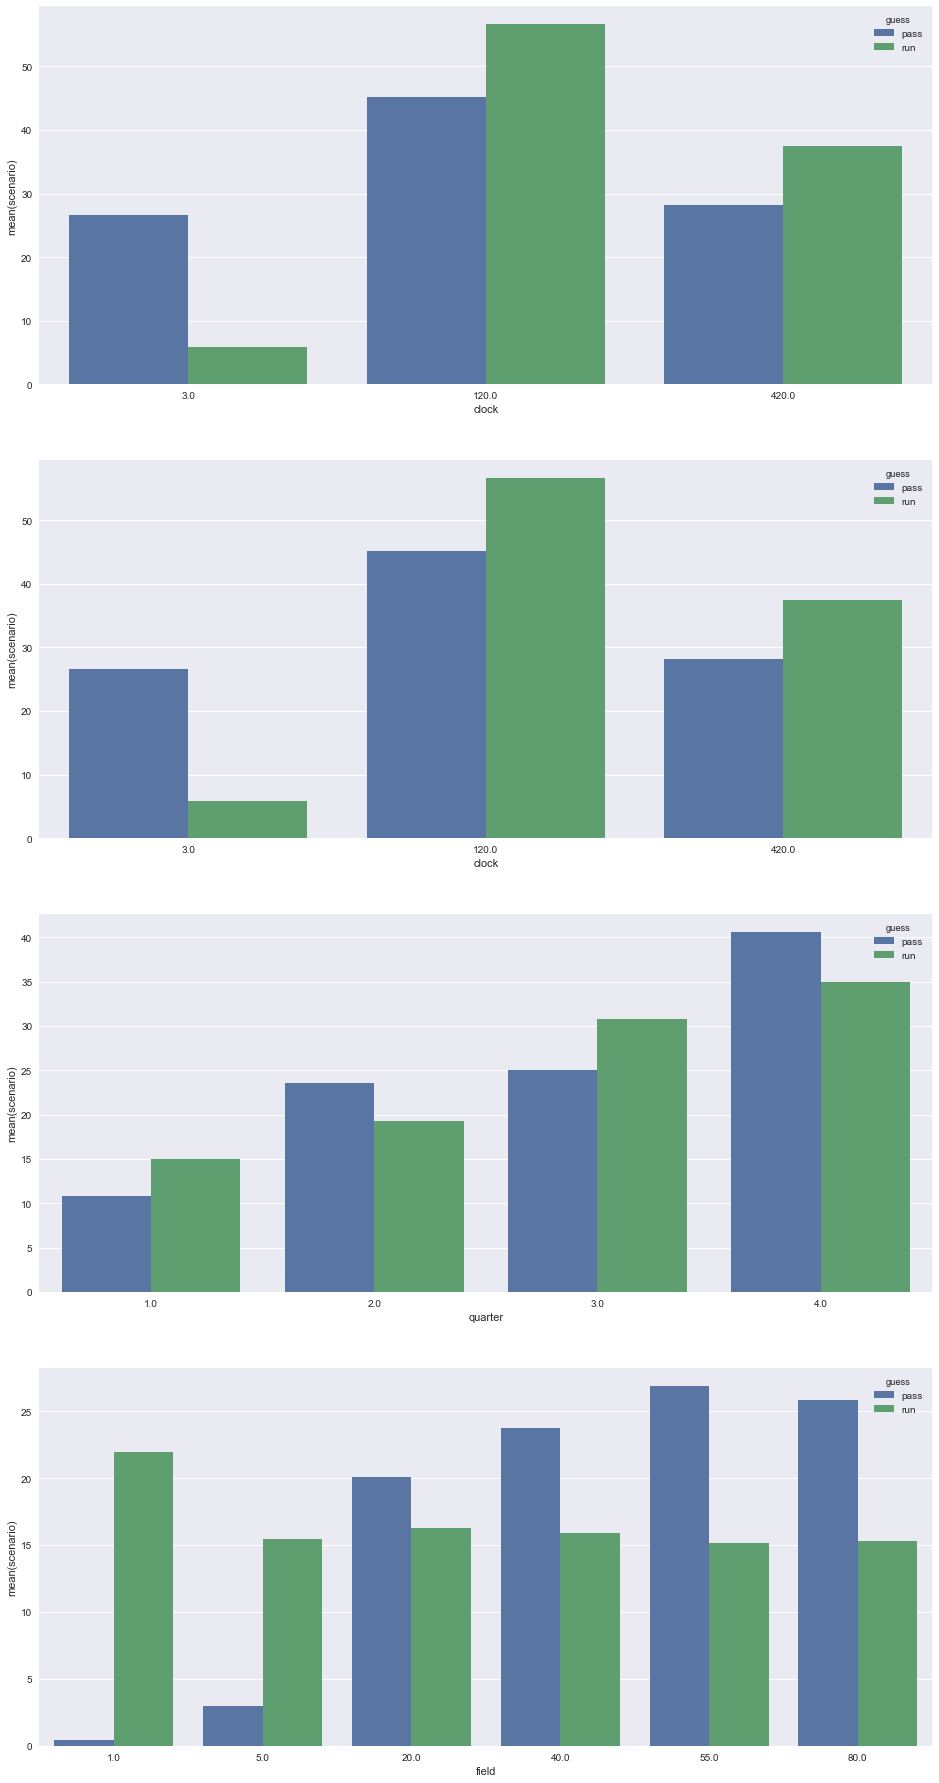

In [9]:
fig = plt.figure(figsize=(16,32))
ax1 = fig.add_subplot(411)
ax1 = plot_PlayType(crowd_flower,'clock',['run','pass'],True)

ax2 = fig.add_subplot(412)
ax2 = plot_PlayType(crowd_flower,'clock',['run','pass'],True)

ax3 = fig.add_subplot(413)
ax3 = plot_PlayType(crowd_flower,'quarter',['run','pass'],True)

ax4 = fig.add_subplot(414)
ax4 = plot_PlayType(crowd_flower,'field',['run','pass'],True)
